In [1]:
#Imports
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from astropy.table import Table

In [3]:
#Load TNG
basePath = 'D:/Buhv2020Work/Illustris-3/output'
snapshot_ind = 99 #redshift ?

header = il.groupcat.loadHeader(basePath, snapshot_ind)
scale_factor = header['Time']

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)

subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

subhalo_table = Table({'Index': [x+1 for x in range(subhalo_grp['count'])]})
for i in range(1, len(subhalo_keys)):
    subhalo_table.add_column(subhalo_grp[str(subhalo_keys[i])], name=str(subhalo_keys[i]))
    
halo_table = Table({'Index': [x+1 for x in range(halo_grp['count'])]})
for i in range(1, len(halo_keys)):
    halo_table.add_column(halo_grp[str(halo_keys[i])], name=str(halo_keys[i]))

#print(subhalo_table)
#print(halo_table)

In [15]:
print(len(halo_table[halo_table['GroupLen']<50]))

47952


In [9]:
#Applying basic subahlo cuts to remove junk data:
print(len(subhalo_table))

subhalo_table = subhalo_table[subhalo_table['SubhaloFlag']]
print(len(subhalo_table))
print('Subhalo flag mask complete\n')


subhalo_table = subhalo_table[subhalo_table['SubhaloMass']!=0]
print(len(subhalo_table))
print('Mass Mask complete\n')

subhalo_table = subhalo_table[subhalo_table['SubhaloMassType'][:,4]!=0]
print(len(subhalo_table))
print('Stellar Mass Mask complete \n')

mask = subhalo_table['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask[:,0]
for i in range (1,8):
    photo_mask = photo_mask & mask[:,i]
subhalo_table = subhalo_table[photo_mask]
print(len(subhalo_table))
print('Photo Mask complete \n\n')
pre_masscut = subhalo_table

118820
118613
Subhalo flag mask complete

118613
Mass Mask complete

21661
Stellar Mass Mask complete 

21661
Photo Mask complete 




D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


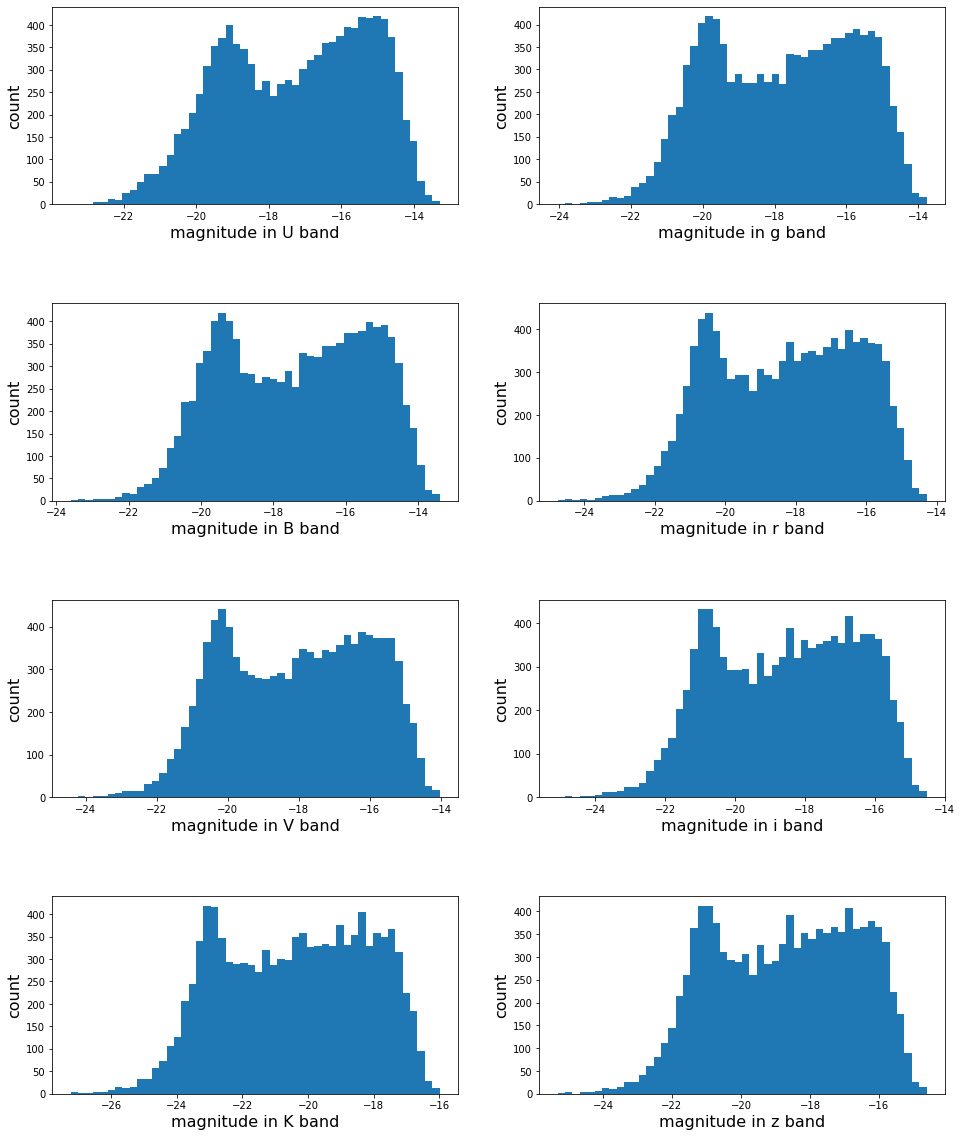

In [10]:
#Overall bands plot
subhalomass = np.array(np.log10(subhalo_table["SubhaloMassInHalfRad"]*1e10/0.704))
mask = subhalomass > 10.3
st = subhalo_table[mask]

fig, ax = plt.subplots(4,2)
fig.set_size_inches(16,20)
plt.subplots_adjust(hspace = 0.5)
band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
for bands in range(8):
    mag = st['SubhaloStellarPhotometrics'][:,bands]
    ax[bands%4][bands//4].hist(mag, bins=50)
    ax[bands%4][bands//4].set_xlabel('magnitude in ' + band_names[bands] + " band", fontsize = 16 )
    ax[bands%4][bands//4].set_ylabel('count', fontsize = 16)

plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


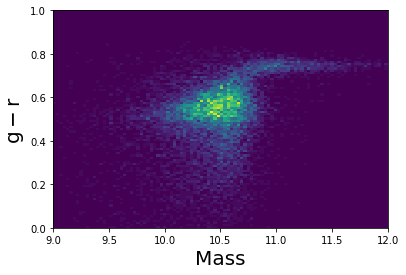

In [21]:
#Recreating Figure 3 from https://arxiv.org/pdf/1707.03395.pdf
masscut_nine = cut(pre_masscut, "SubhaloMassInHalfRad", 9)

mag = masscut_nine['SubhaloStellarPhotometrics'][:,4] - masscut_nine['SubhaloStellarPhotometrics'][:,5]

mass = np.array(np.log10(masscut_nine["SubhaloMassInHalfRad"]*1e10/0.704))
plt.ylabel("$\mathrm{g-r}$", fontsize = 20)
plt.xlabel("Mass", fontsize = 20)

#heights, mass_bins, mag_bins = np.histogram2d(mass, mag, bins=50)
#plt.contour(mass_bins[0:50],mag_bins[0:50], heights, colors=['red','orange','pink','green'])
plt.hist2d(mass, mag, bins=100, cmap='viridis', range=[[9,12], [0,1]])
plt.show()

In [11]:
def color_color(mag, r1, r2):
    g_minus_r = mag[:,4]-mag[:,5]
    r_minus_z = mag[:,5]-mag[:,7]
    plt.figure(figsize=(12,10))
    #heights, rmz,gmr = np.histogram2d(r_minus_z,g_minus_r,bins=150)
    plt.hist2d(g_minus_r,r_minus_z, bins = 150, cmap='viridis', range=[[r1, 1], [r2, 1]], cmin = 0.1)
    plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
    plt.ylabel("$\mathrm{r-z}$", fontsize = 20)
    plt.title("Color-Color plane plot", fontsize = 20)
    plt.colorbar()
    plt.grid(b=True, which='both', axis='both')
    #print(len(g_minus_r))
    #print(str(len(g_minus_r[g_minus_r>0.5])) + "\n")
    #levels = np.linspace(0, 40,num=4)
    #plt.contour(gmr[0:150],rmz[0:150], heights, levels=levels, 
                #extent=[0,0,0.8,0.7], colors=['red','orange','pink','green'])

In [12]:
def cut(table, field, num):
    subhalomass = np.array(np.log10(table[field]*1e10/0.704))
    mask = subhalomass > num
    return table[mask]

In [13]:
def color_density(mag, band1, band2, band3, title):
    band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
    r = mag[:,band1]
    r_minus_z = mag[:,band2]-mag[:,band3]
    plt.figure(figsize=(8,6))
    plt.hist2d(r_minus_z, r, bins = 80, cmap='viridis')#, range=[[0, 0.7], [0, 0.8]])
    plt.xlabel(band_names[band2]+"-"+band_names[band3], fontsize = 20)
    plt.ylabel(band_names[band1], fontsize = 20)
    plt.title(title, fontsize = 20)
    plt.colorbar()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


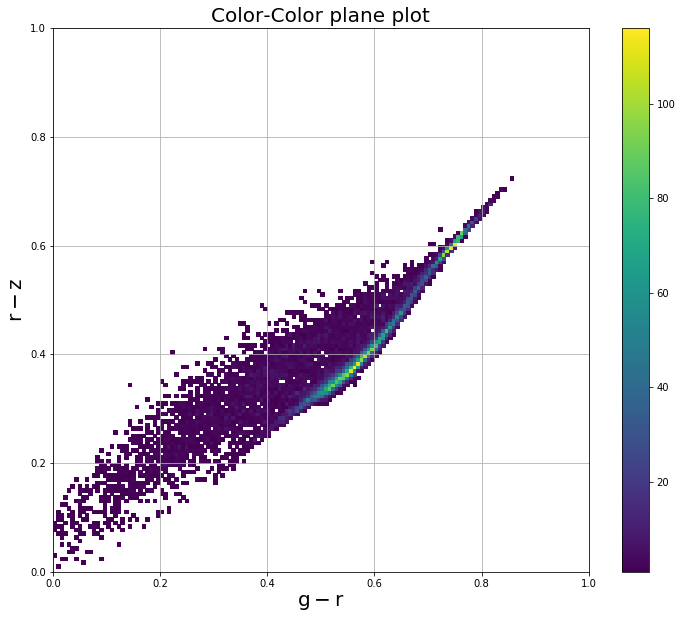

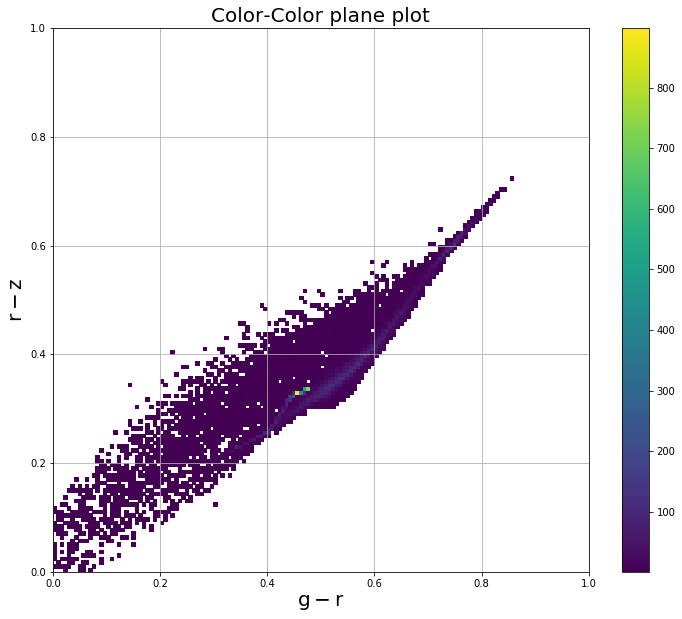

In [14]:
color_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 10)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)

color_color_cut = cut(pre_masscut, 'SubhaloMass', 10)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)